<a href="https://colab.research.google.com/github/rhaagsma/Projeto_Final_Marvel/blob/insight-1/TestesInsights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Possíveis Insights
* Popularidade dos Personagens: quais personagens estavam presentes em mais comics por década?

* Quais comics foram lançadas por evento (???)

# Insights sobre preços das comics:
Existem muitos preços faltantes
* Total de comics: 64273
* Qtde de comics com preço 0: 24819

Ou seja, aproximadamente 38.62% dos quadrinhos estão sem preço



preço por data? média dos preços?

In [28]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
con = sqlite3.connect('banco.db')
# Carregar dados da tabela comics
df = pd.read_sql_query("SELECT price FROM comics", con)

# Estatísticas básicas
media = df['price'].mean()
mediana = df['price'].median()
minimo = df['price'].min()
maximo = df['price'].max()

print(f"Comics Totais: {df.shape[0]}")
print(f"Média: {media:.2f}")
print(f"Mínimo: {minimo:.2f}")
print(f"Máximo: {maximo:.2f}")
con.close()

Comics Totais: 64268
Média: 6.15
Mínimo: 0.00
Máximo: 500.00


In [52]:
con = sqlite3.connect('banco.db')

# Carregar dados da tabela comics
df = pd.read_sql_query("SELECT price FROM comics", con)
con.close()
# Filtrar preços válidos (> 0)
df_sem0 = df[df['price'] > 0]

# Estatísticas básicas
media = df_sem0['price'].mean()
mediana = df_sem0['price'].median()
minimo = df_sem0['price'].min()
maximo = df_sem0['price'].max()

print(f"Comics com preço diferente de 0: {df_sem0.shape[0]}")
print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Mínimo: {minimo:.2f}")
print(f"Máximo: {maximo:.2f}")
con.close()

Comics com preço diferente de 0: 39449
Média: 10.01
Mediana: 3.99
Mínimo: 0.10
Máximo: 500.00


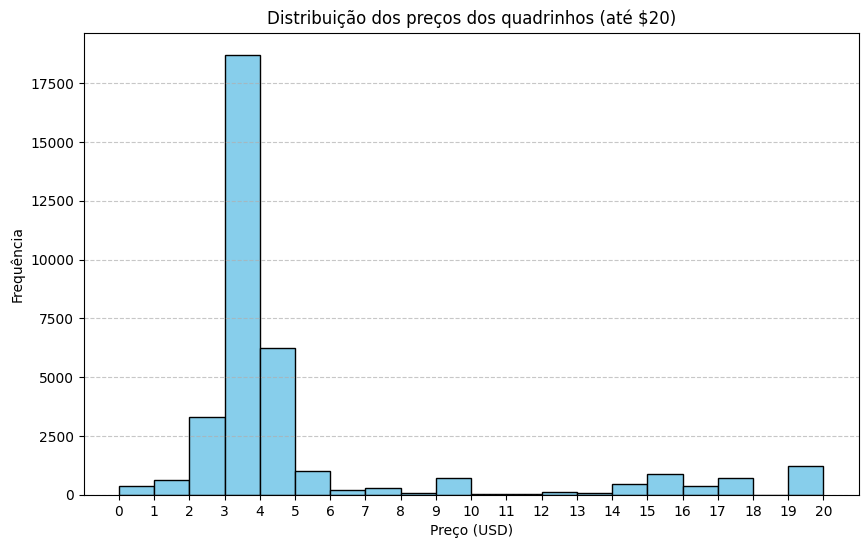

In [12]:
# Filtrar preços até $20
df_ate_20 = df[df['price'] <= 20]

# Plotar histograma com bins de 1 em 1
plt.figure(figsize=(10, 6))
plt.hist(df_ate_20['price'], bins=range(0, 21), edgecolor='black', color='skyblue')
plt.title("Distribuição dos preços dos quadrinhos (até $20)")
plt.xlabel("Preço (USD)")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 21))  # Mostrar ticks de 1 em 1
plt.show()

In [24]:
con = sqlite3.connect('banco.db')
cursor = con.cursor()

sql_query = """

              SELECT c.name Personagem,
              com.title Titulo
              FROM characters c JOIN characters_comics ccom
                ON c.id = ccom.character_id
              JOIN comics com ON com.id = ccom.comic_id
              """

df = pd.read_sql_query(sql_query, con)
df.head()


,Personagem,Titulo
0,3-D Man,Avengers: The Initiative (2007) #19
1,3-D Man,Avengers: The Initiative (2007) #18
2,3-D Man,Avengers: The Initiative (2007) #18
3,3-D Man,Avengers: The Initiative (2007) #17
4,3-D Man,Avengers: The Initiative (2007) #16
...,...,...
245,Abyss,Uncanny X-Men (1981) #406
246,Abyss,Uncanny X-Men (1981) #405
247,Abyss,Uncanny X-Men (1981) #404
248,Abyss,Uncanny X-Men (1981) #402
